In [1]:
from fastbook import *
from fastai.vision.all import *

In [2]:
salmon_urls = search_images_ddg('swimming salmon', max_images=100)
tuna_urls = search_images_ddg('swimming tuna', max_images=100)
catfish_urls = search_images_ddg('swimming catfish', max_images=100)

#urls

In [4]:
'''
for i in range(len(salmon_urls)):
    try:  
        download_url(salmon_urls[i], 'fish/salmon/salmon' + str(i) + '.jpg')
        download_url(tuna_urls[i], 'fish/tuna/tuna' + str(i) + '.jpg')
        download_url(catfish_urls[i], 'fish/catfish/catfish' + str(i) + '.jpg')
    except:
        continue
'''

"\nfor i in range(len(salmon_urls)):\n    try:  \n        download_url(salmon_urls[i], 'fish/salmon/salmon' + str(i) + '.jpg')\n        download_url(tuna_urls[i], 'fish/tuna/tuna' + str(i) + '.jpg')\n        download_url(catfish_urls[i], 'fish/catfish/catfish' + str(i) + '.jpg')\n    except:\n        continue\n"

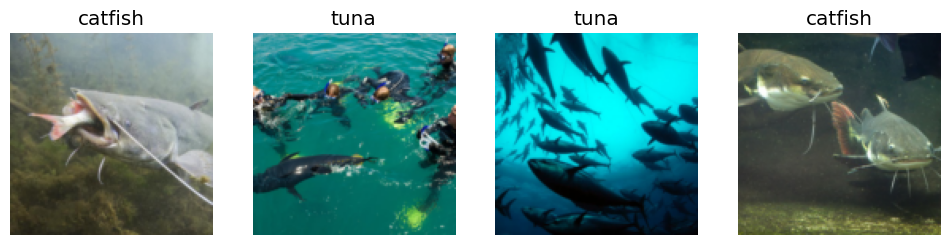

In [5]:
path = 'fish'

fish = DataBlock(
     blocks = (ImageBlock, CategoryBlock),
     get_items = get_image_files,
     splitter = RandomSplitter(valid_pct=0.2, seed=42),
     get_y = parent_label,
     item_tfms = Resize(128),
     batch_tfms=aug_transforms()
)

dls = fish.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [12]:
fish = fish.new(item_tfms=RandomResizedCrop(128, min_scale=0.5))
dls = fish.dataloaders(path)
#dls.train.show_batch(max_n=4, nrows=1, unique=True)

learn = vision_learner(dls, resnet34, metrics=error_rate, )
learn.fine_tune(16)

C:\Users\User\anaconda3\envs\py37_fastai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.991753,1.743385,0.666667,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.729636,1.363378,0.600000,00:05
1,1.502631,0.973093,0.444444,00:06
2,1.343660,0.690114,0.266667,00:05
3,1.233743,0.523116,0.177778,00:05
4,1.064195,0.397242,0.111111,00:05
5,0.938581,0.345172,0.133333,00:06
6,0.831592,0.327589,0.111111,00:05
7,0.743949,0.332154,0.111111,00:05
8,0.666829,0.336961,0.133333,00:06
9,0.594635,0.332077,0.133333,00:05


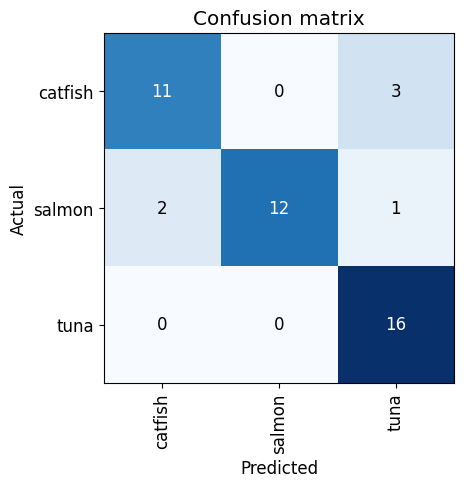

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()